<a href="https://www.kaggle.com/code/davidjohnmillard/gasl-eda?scriptVersionId=120977776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports/Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
path_train = '/kaggle/input/asl-signs/train.csv'

In [3]:
dftr = pd.read_csv(path_train)

We select the first associated landmark files to get a feel for how the data feels.

In [4]:
dftr

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [5]:
example_landmark = pd.read_parquet('/kaggle/input/asl-signs/train_landmark_files/26734/1000035562.parquet')

In [6]:
example_landmark

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
12484,42,42-right_hand-16,right_hand,16,0.001660,0.549574,-0.145409
12485,42,42-right_hand-17,right_hand,17,0.042694,0.693116,-0.085307
12486,42,42-right_hand-18,right_hand,18,0.006723,0.665044,-0.114017
12487,42,42-right_hand-19,right_hand,19,-0.014755,0.643799,-0.123488


In [7]:
example_landmark['frame'].min()

20

In [8]:
example_landmark['frame'].max()

42

In [9]:
example_landmark['frame'].max() - example_landmark['frame'].min()

22

In [10]:
minn = example_landmark['frame'].min()
maxx = example_landmark['frame'].max()

face_dict = {}
pose_dict = {}
rh_dict = {}
lh_dict = {} 

for i in range(minn, maxx+1):
    print('Frame: ' + str(i))
    t = example_landmark[example_landmark['frame'] == i]
    print('   Face: ' + str(t[t['type'] == 'face']['x'].isnull().sum()))
    print('   Pose: ' + str(t[t['type'] == 'pose']['x'].isnull().sum()))
    print('   RH: ' + str(t[t['type'] == 'right_hand']['x'].isnull().sum()))
    print('   LH: ' + str(t[t['type'] == 'left_hand']['x'].isnull().sum()))

Frame: 20
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 21
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 22
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 23
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 24
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 25
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 26
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 27
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 28
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 29
   Face: 0
   Pose: 0
   RH: 0
   LH: 21
Frame: 30
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 31
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 32
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 33
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 34
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 35
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 36
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 37
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 38
   Face: 0
   Pose: 0
   RH: 21
   LH: 21
Frame: 39
   Face: 0
 

It looks like the left hand has no information.
The data later on should reveal that the pose will have the left hand out of screen.

In [11]:
sgl_in = example_landmark[example_landmark['frame'] == 21]

In [12]:
sgl_in['type'].value_counts()

face          468
pose           33
left_hand      21
right_hand     21
Name: type, dtype: int64

In [13]:
sgl_in_rh = sgl_in[sgl_in['type'] == 'right_hand']

In [14]:
sgl_in_rh

,frame,row_id,type,landmark_index,x,y,z
1065,21,21-right_hand-0,right_hand,0,0.324517,0.548338,-1.557659e-07
1066,21,21-right_hand-1,right_hand,1,0.387831,0.498510,1.798490e-02
1067,21,21-right_hand-2,right_hand,2,0.415546,0.453401,2.024590e-02
1068,21,21-right_hand-3,right_hand,3,0.439700,0.417401,9.602044e-03
1069,21,21-right_hand-4,right_hand,4,0.460026,0.386194,-1.909269e-03
1070,21,21-right_hand-5,right_hand,5,0.373587,0.413692,4.272605e-02
1071,21,21-right_hand-6,right_hand,6,0.397488,0.367304,2.332437e-02
1072,21,21-right_hand-7,right_hand,7,0.434238,0.372896,1.499567e-03
1073,21,21-right_hand-8,right_hand,8,0.460619,0.383279,-1.299786e-02
1074,21,21-right_hand-9,right_hand,9,0.350432,0.415225,1.587926e-02


In [15]:
def add_init_c(start, end, hand):
    return (
        pd.concat([hand['x'][start:start+1], hand['x'][end[0]:end[1]]]), 
        pd.concat([hand['y'][start:start+1], hand['y'][end[0]:end[1]]]), 
        pd.concat([hand['z'][start:start+1], hand['z'][end[0]:end[1]]])
        )

In [16]:
def plot_hand(hand, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    ind = [[0, [0, 5]], [0, [5, 9]], [0, [17, 21]], [5, [9, 13]], [17, [13, 17]], [9, [13, 14]]]

    for i, k in ind: 
        x, y, z = add_init_c(i, k, hand)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)

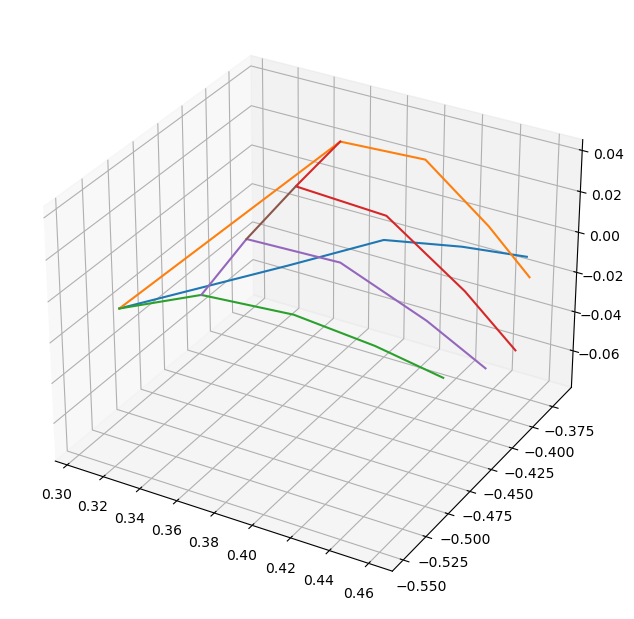

In [17]:
plot_hand(sgl_in_rh, True)

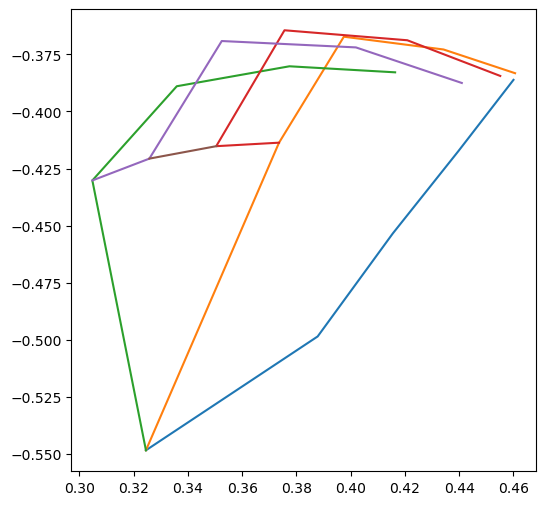

In [18]:
plot_hand(sgl_in_rh, False)

In [19]:
sgl_in_lh = sgl_in[sgl_in['type'] == 'left_hand']

In [20]:
sgl_in_lh

,frame,row_id,type,landmark_index,x,y,z
1011,21,21-left_hand-0,left_hand,0,NaN,NaN,NaN
1012,21,21-left_hand-1,left_hand,1,NaN,NaN,NaN
1013,21,21-left_hand-2,left_hand,2,NaN,NaN,NaN
1014,21,21-left_hand-3,left_hand,3,NaN,NaN,NaN
1015,21,21-left_hand-4,left_hand,4,NaN,NaN,NaN
1016,21,21-left_hand-5,left_hand,5,NaN,NaN,NaN
1017,21,21-left_hand-6,left_hand,6,NaN,NaN,NaN
1018,21,21-left_hand-7,left_hand,7,NaN,NaN,NaN
1019,21,21-left_hand-8,left_hand,8,NaN,NaN,NaN
1020,21,21-left_hand-9,left_hand,9,NaN,NaN,NaN


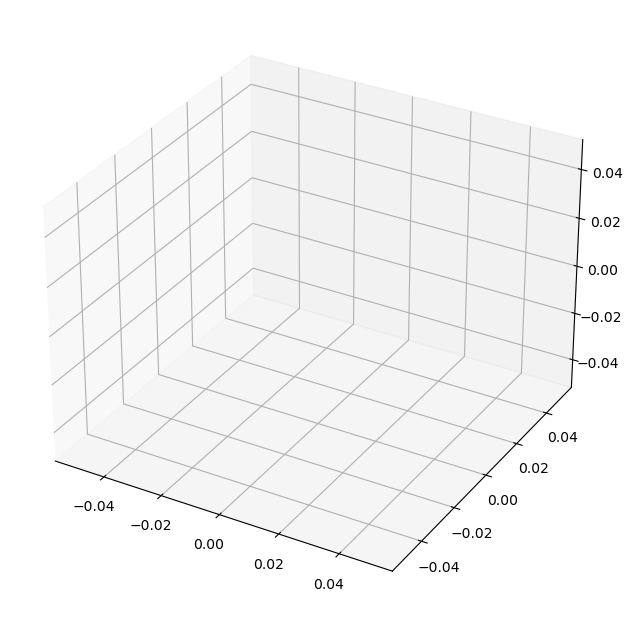

In [21]:
plot_hand(sgl_in_lh, True)

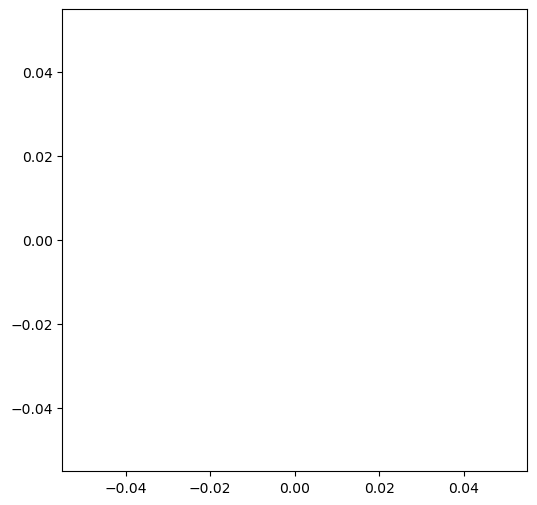

In [22]:
plot_hand(sgl_in_lh, False)

In [23]:
sgl_in_p = sgl_in[sgl_in['type'] == 'pose']

In [24]:
sgl_in_p

,frame,row_id,type,landmark_index,x,y,z
1032,21,21-pose-0,pose,0,0.522175,0.327015,-0.851489
1033,21,21-pose-1,pose,1,0.565269,0.280448,-0.778708
1034,21,21-pose-2,pose,2,0.589815,0.281365,-0.779076
1035,21,21-pose-3,pose,3,0.611988,0.283100,-0.779156
1036,21,21-pose-4,pose,4,0.492643,0.283062,-0.758925
1037,21,21-pose-5,pose,5,0.473426,0.284674,-0.758399
1038,21,21-pose-6,pose,6,0.454361,0.286732,-0.758833
1039,21,21-pose-7,pose,7,0.646040,0.308192,-0.334320
1040,21,21-pose-8,pose,8,0.439378,0.306222,-0.202693
1041,21,21-pose-9,pose,9,0.572650,0.372704,-0.692659


In [25]:
def plot_pose(pose, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    ind = [[0, [1, 4]], [3, [7, 8]], [0, [4, 7]], [6, [8, 9]], [9, [10, 11]], [11, [12, 13]], [12, [14, 15]], [14, [16, 17]], 
           [16, [22, 23]], [16, [18, 19]], [16, [20, 21]], [18, [20, 21]], [11, [13, 14]], [13, [15, 16]], [15, [21, 22]], [15, [19, 20]],
           [15, [17, 18]], [17, [19, 20]], [12, [24, 25]], [24, [26, 27]], [26, [28, 29]], [28, [30, 31]], [30, [32, 33]], [28, [32, 33]], 
           [11, [23, 24]], [23, [25, 26]], [25, [27, 28]], [27, [29, 30]], [29, [31, 32]], [27, [31, 32]], [23, [24, 25]]]

    for i, k in ind: 
        x, y, z = add_init_c(i, k, pose)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)

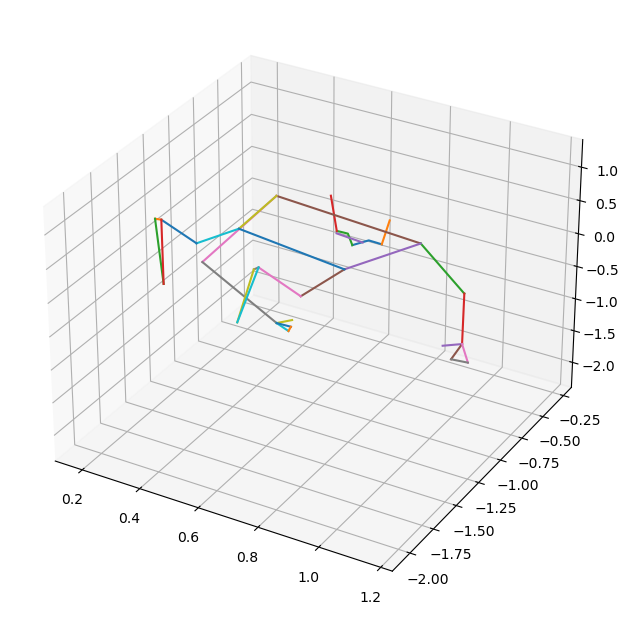

In [26]:
plot_pose(sgl_in_p, True)

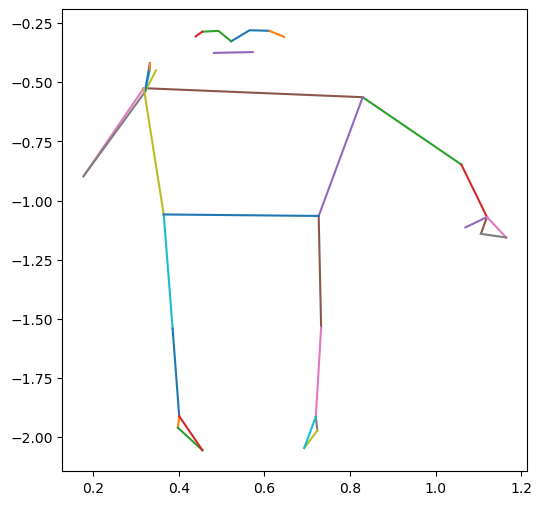

In [27]:
plot_pose(sgl_in_p, False)

In [28]:
sgl_in_f = sgl_in[sgl_in['type'] == 'face']

In [29]:
sgl_in_f

,frame,row_id,type,landmark_index,x,y,z
543,21,21-face-0,face,0,0.501150,0.380554,-0.031570
544,21,21-face-1,face,1,0.492906,0.349360,-0.058176
545,21,21-face-2,face,2,0.498327,0.358128,-0.031189
546,21,21-face-3,face,3,0.487708,0.320568,-0.040426
547,21,21-face-4,face,4,0.492322,0.340403,-0.061569
...,...,...,...,...,...,...,...
1006,21,21-face-463,face,463,0.536807,0.298735,0.000994
1007,21,21-face-464,face,464,0.529238,0.300919,-0.003959
1008,21,21-face-465,face,465,0.524165,0.302481,-0.011143
1009,21,21-face-466,face,466,0.592553,0.293117,-0.003791


In [30]:
def plot_face(face, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    if td:
        ax.scatter(face['x'], -1*face['y'], face['z'])
    else:
        ax.scatter(face['x'], -1*face['y'])

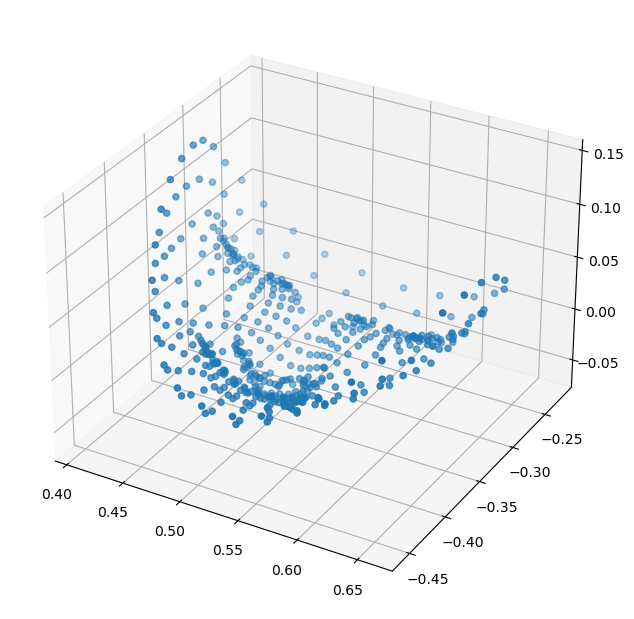

In [31]:
plot_face(sgl_in_f, True)

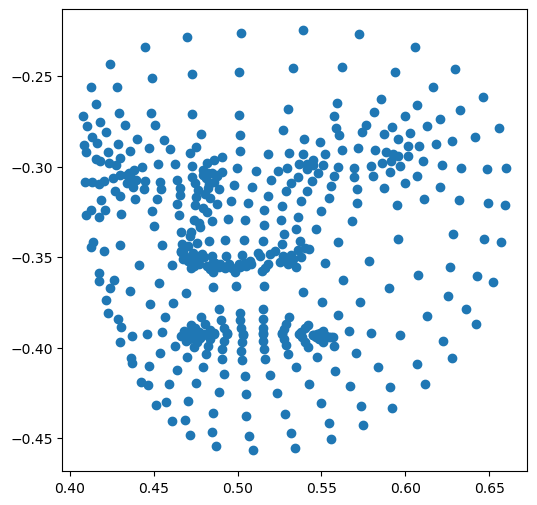

In [32]:
plot_face(sgl_in_f, False)

In [33]:
def plot_mix(pose, face, rhand, lhand, td):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    ind = [[11, [12, 13]], [12, [14, 15]], [14, [16, 17]], [11, [13, 14]], [13, [15, 16]], [12, [24, 25]], 
           [24, [26, 27]], [26, [28, 29]], [28, [30, 31]], [30, [32, 33]], [28, [32, 33]], [11, [23, 24]], [23, [25, 26]], [25, [27, 28]], 
           [27, [29, 30]], [29, [31, 32]], [27, [31, 32]], [23, [24, 25]]]

    if td:
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

    for i, k in ind: 
        x, y, z = add_init_c(i, k, pose)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)
            
    if td:
        ax.scatter(face['x'], -1*face['y'], face['z'])
    else:
        ax.scatter(face['x'], -1*face['y'])
        
    ind = [[0, [0, 5]], [0, [5, 9]], [0, [17, 21]], [5, [9, 13]], [17, [13, 17]], [9, [13, 14]]]
    
    for i, k in ind: 
        x, y, z = add_init_c(i, k, rhand)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)
    
    for i, k in ind: 
        x, y, z = add_init_c(i, k, lhand)
        if td:
            ax.plot(x, -1*y, z)
        else:
            ax.plot(x, -1*y)

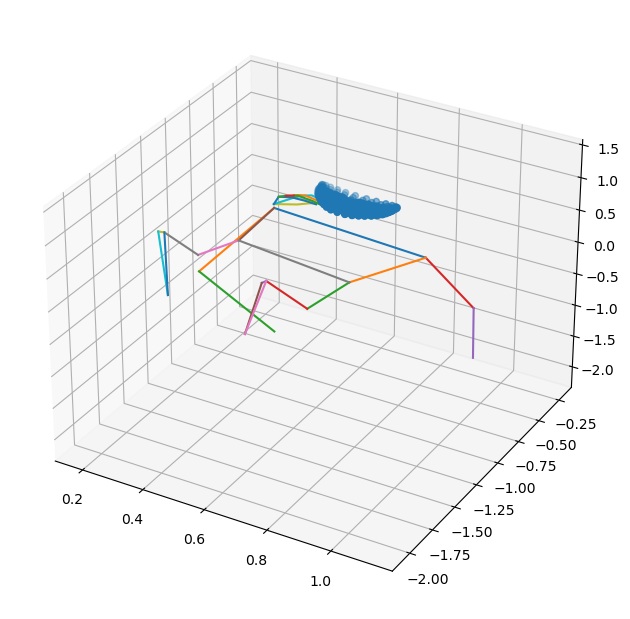

In [34]:
plot_mix(sgl_in_p, sgl_in_f, sgl_in_rh, sgl_in_lh, True)

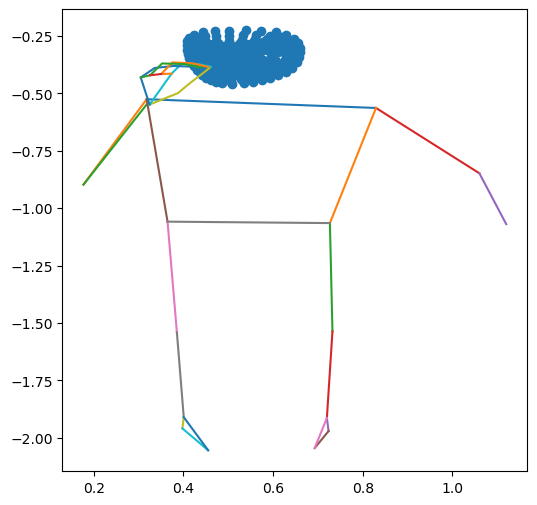

In [35]:
plot_mix(sgl_in_p, sgl_in_f, sgl_in_rh, sgl_in_lh, False)

In [36]:
"""def run_animation():
    
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)
    
    plt.ion()
    
    for i in range(minn, maxx+1):
        t = example_landmark[example_landmark['frame'] == i]
        sgl_in_f = t[t['type'] == 'face']
        sgl_in_p = t[t['type'] == 'pose']
        sgl_in_rh = t[t['type'] == 'right_hand']
        sgl_in_lh = t[t['type'] == 'left_hand']

        plot_mix(sgl_in_p, sgl_in_f, sgl_in_rh, sgl_in_lh, False, ax, fig)
        plt.show()
        time.sleep(1)
        ax.clear()
                
run_animation()"""

"def run_animation():\n    \n    fig, ax = plt.subplots()\n    fig.set_size_inches(6, 6)\n    \n    plt.ion()\n    \n    for i in range(minn, maxx+1):\n        t = example_landmark[example_landmark['frame'] == i]\n        sgl_in_f = t[t['type'] == 'face']\n        sgl_in_p = t[t['type'] == 'pose']\n        sgl_in_rh = t[t['type'] == 'right_hand']\n        sgl_in_lh = t[t['type'] == 'left_hand']\n\n        plot_mix(sgl_in_p, sgl_in_f, sgl_in_rh, sgl_in_lh, False, ax, fig)\n        plt.show()\n        time.sleep(1)\n        ax.clear()\n                \nrun_animation()"